In [11]:
#For questions 1a, 1b, 1c, and 1d, consider only amount-of-bill-statement attributes (i.e., X12-X17).
# 1a.(10 pts) For each amount-of-bill-statement attribute (i.e., X12-X17), calculate its average, standard deviation, minimum, and maximum values.

import pandas as pd

# Read the dataset into a Pandas DataFrame
df = pd.read_csv('Default-of-Credit-Card-Clients.csv')

# Select the amount-of-bill-statement attributes
df_subset = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]

# Calculate the mean, standard deviation, minimum, and maximum of each attribute
for col in df_subset.columns:
    mean = df_subset[col].mean()
    std = df_subset[col].std()
    minimum = df_subset[col].min()
    maximum = df_subset[col].max()
    print(f"Attribute {col}: mean = {mean:.2f}, std = {std:.2f}, min = {minimum}, max = {maximum}")



Attribute BILL_AMT1: mean = 51223.33, std = 73635.86, min = -165580, max = 964511
Attribute BILL_AMT2: mean = 49179.08, std = 71173.77, min = -69777, max = 983931
Attribute BILL_AMT3: mean = 47013.15, std = 69349.39, min = -157264, max = 1664089
Attribute BILL_AMT4: mean = 43262.95, std = 64332.86, min = -170000, max = 891586
Attribute BILL_AMT5: mean = 40311.40, std = 60797.16, min = -81334, max = 927171
Attribute BILL_AMT6: mean = 38871.76, std = 59554.11, min = -339603, max = 961664


In [2]:
#1b. (10 pts) Compute the covariance and correlation between those attribute pairs.

columns_to_analyze =  ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

#  Compute the covariance
covariance_matrix = df[columns_to_analyze].cov()

# show Compute the covariance
print("Covariance Matrix:")
print(covariance_matrix)

#  Compute the correlation
correlation_matrix = df[columns_to_analyze].corr()

# show the correlation
print("\nCorrelation Matrix:")
print(correlation_matrix)


Covariance Matrix:
              BILL_AMT1     BILL_AMT2     BILL_AMT3     BILL_AMT4  \
BILL_AMT1  5.422240e+09  4.986670e+09  4.556511e+09  4.075286e+09   
BILL_AMT2  4.986670e+09  5.065705e+09  4.582086e+09  4.086508e+09   
BILL_AMT3  4.556511e+09  4.582086e+09  4.809338e+09  4.122238e+09   
BILL_AMT4  4.075286e+09  4.086508e+09  4.122238e+09  4.138716e+09   
BILL_AMT5  3.714795e+09  3.720401e+09  3.726780e+09  3.677105e+09   
BILL_AMT6  3.519876e+09  3.524868e+09  3.524247e+09  3.451762e+09   

              BILL_AMT5     BILL_AMT6  
BILL_AMT1  3.714795e+09  3.519876e+09  
BILL_AMT2  3.720401e+09  3.524868e+09  
BILL_AMT3  3.726780e+09  3.524247e+09  
BILL_AMT4  3.677105e+09  3.451762e+09  
BILL_AMT5  3.696294e+09  3.425914e+09  
BILL_AMT6  3.425914e+09  3.546692e+09  

Correlation Matrix:
           BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6
BILL_AMT1   1.000000   0.951484   0.892279   0.860272   0.829779   0.802650
BILL_AMT2   0.951484   1.000000   0.928326  

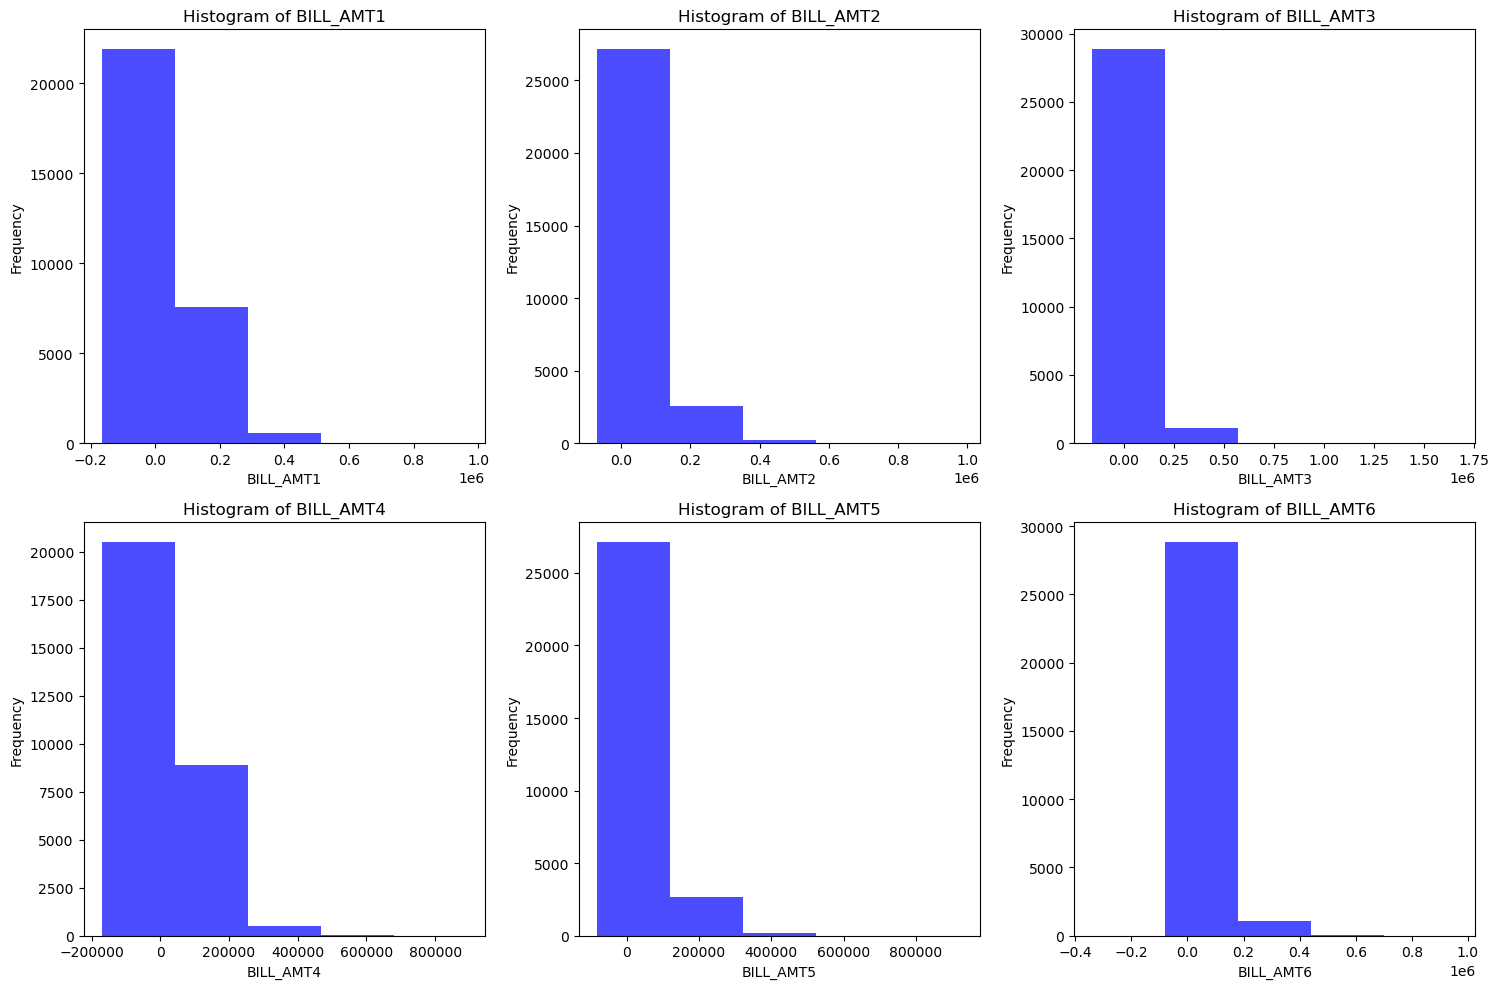

In [6]:
#1c. (10 pts) Display the histogram for each of those quantitative attributes by discretizing it into 5 separate bins and counting the frequency for each bin.

import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns X12 to X17
# If your columns are named differently, replace them accordingly

# List of column names for quantitative attributes
columns_to_analyze = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
# Set the number of bins
num_bins = 5

# Create subplots for each attribute
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Iterate through columns and create histograms
for i, column in enumerate(columns_to_analyze):
    ax = axs[i]
    ax.hist(df[column], bins=num_bins, color='blue', alpha=0.7)
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of {column}')

# Adjust subplot layout
plt.tight_layout()

# Show the histograms
plt.show()


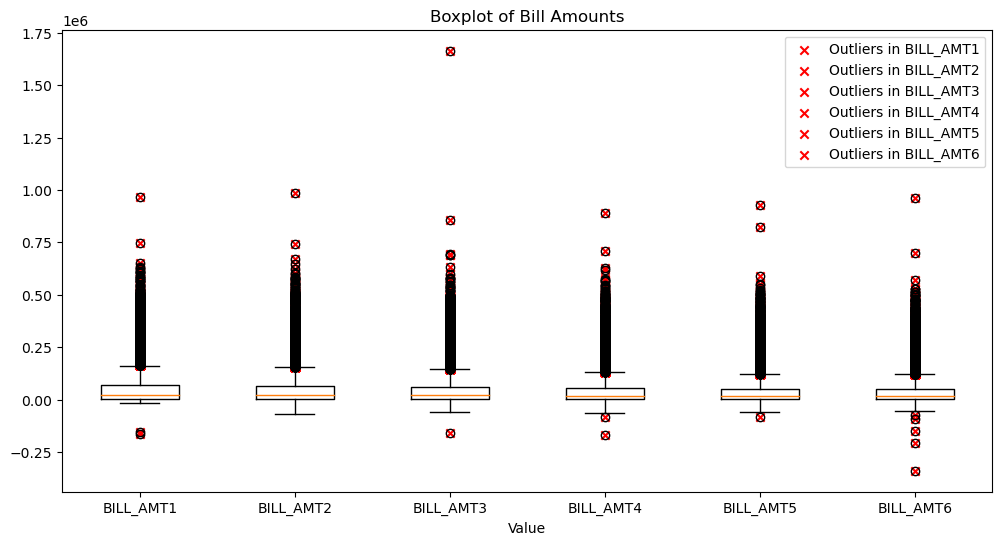

In [16]:
#1d. (10 pts) Display a boxplot to show the distribution of values for each of those attributes. Which attribute has outliers?

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

 
# List of column names for quantitative attributes
columns_to_analyze = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

# Create a boxplot for each attribute

plt.figure(figsize=(12, 6))
boxplot = plt.boxplot([df[col] for col in columns_to_analyze], labels=columns_to_analyze)
plt.xlabel('Value')
plt.title('Boxplot of Bill Amounts')

#  Find outliers
def identify_outliers(column):
    q1 = np.percentile(column, 25)
    q3 = np.percentile(column, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = [val for val in column if val < lower_bound or val > upper_bound]
    return outliers

for i, col in enumerate(columns_to_analyze):
    outliers = identify_outliers(df[col])
    if outliers:
        plt.scatter([i + 1] * len(outliers), outliers, marker='x', color='red', label=f'Outliers in {col}')

#  Show outliers
plt.legend()
plt.show()




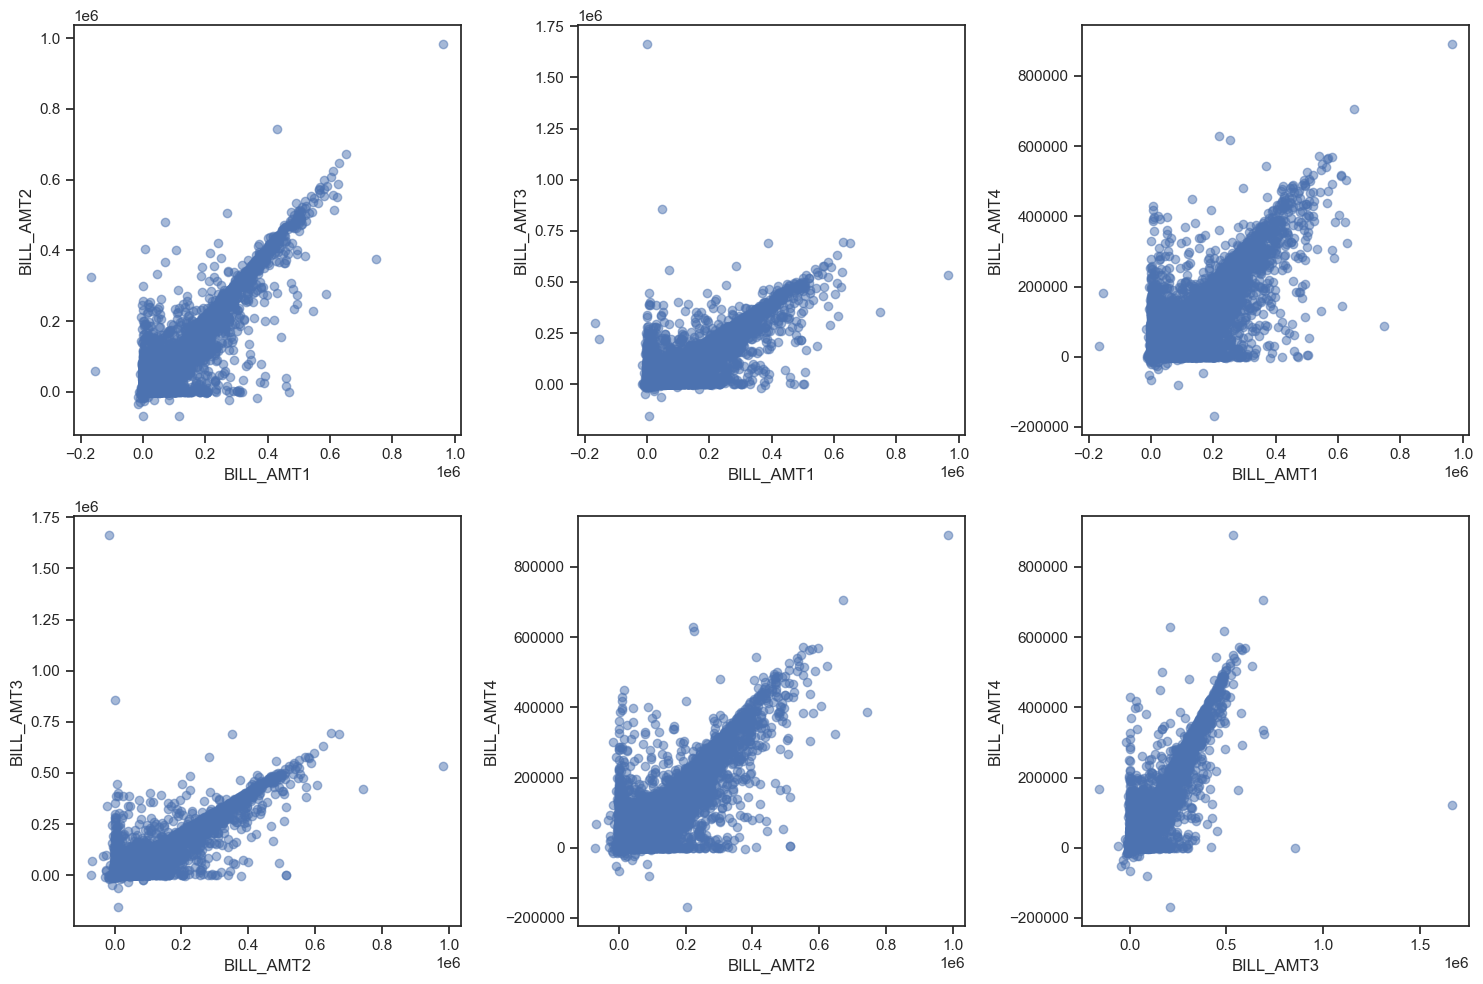

In [45]:
# 1e. (10 pts) Consider the four attributes X12-X15.  For each pair of those four attributes, use a scatter plot to visualize their joint distribution.  Based on the scatter plot, what are possible correlations that you can observe?

import matplotlib.pyplot as plt

# Gets four attribute names in the data
attribute_names = df.columns[12:16]

# Create a 2x3 subgraph layout
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# for each all attribute pairs and draw a scatter plot
index = 0
for i in range(3):
    for j in range(i+1, 4):
        ax = axes[index // 3, index % 3]
        ax.scatter(df[attribute_names[i]], df[attribute_names[j]], alpha=0.5)
        ax.set_xlabel(attribute_names[i])
        ax.set_ylabel(attribute_names[j])
        index += 1

# Adjust  layout
plt.tight_layout()

# show scatter plot
plt.show()

.



In [52]:
# question： 1.e Based on the scatter plot, what are possible correlations that you can observe?

## Answer： Separately from the scatter plot, we can see that they are all positively correlated data. 
# And each of them has a linear relationship, a positive correlation. According to the scatter plot, there is a positive linear correlation between the amount of bills for successive months (X12 to X15). 
# This indicates that higher bill amounts in one month tend to correspond to higher bill amounts in the following months.

In [35]:
#2a. (10 pts) Standardize the attributes X1, X5, and X12-X23.

import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Default-of-Credit-Card-Clients.csv')

# Standardize column
columns_to_standardize = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Create a Standardize object
scaler = StandardScaler()

# transform data
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

print (df)

          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE       AGE  PAY_0  PAY_2  \
0          1  -1.136720    2          2         1 -1.246020      2      2   
1          2  -0.365981    2          2         2 -1.029047     -1      2   
2          3  -0.597202    2          2         2 -0.161156      0      0   
3          4  -0.905498    2          2         1  0.164303      0      0   
4          5  -0.905498    1          2         1  2.334029     -1      0   
...      ...        ...  ...        ...       ...       ...    ...    ...   
29995  29996   0.404759    1          3         1  0.381275      0      0   
29996  29997  -0.134759    1          3         2  0.815221     -1     -1   
29997  29998  -1.059646    1          2         2  0.164303      4      3   
29998  29999  -0.674276    1          3         1  0.598248      1     -1   
29999  30000  -0.905498    1          2         1  1.140680      0      0   

       PAY_3  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AM

In [37]:
# 2b. (10 pts) Create a data sample of size 1000 which is randomly selected (without replacement) from the original data.

import pandas as pd

 
df = pd.read_csv('Default-of-Credit-Card-Clients.csv')
# Shuffle the original DataFrame randomly
shuffled_df = df.sample(frac=1, random_state=42)  # 'random_state' for reproducibility

# Select the first 1000 rows as the random sample
sample_size = 1000
sample = shuffled_df.iloc[:sample_size]

# Display the random sample
print(sample)

          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
2308    2309      30000    1          2         2   25      0      0      0   
22404  22405     150000    2          1         2   26      0      0      0   
23397  23398      70000    2          3         1   32      0      0      0   
25058  25059     130000    1          3         2   49      0      0      0   
2664    2665      50000    2          2         2   36      0      0      0   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
1668    1669     100000    1          2         2   30     -2     -2     -2   
24758  24759     100000    1          3         1   40      2      0      0   
4336    4337     330000    2          2         1   39      8      7      6   
15543  15544     180000    1          1         2   30      1     -2     -2   
24409  24410      50000    1          1         1   37      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6 

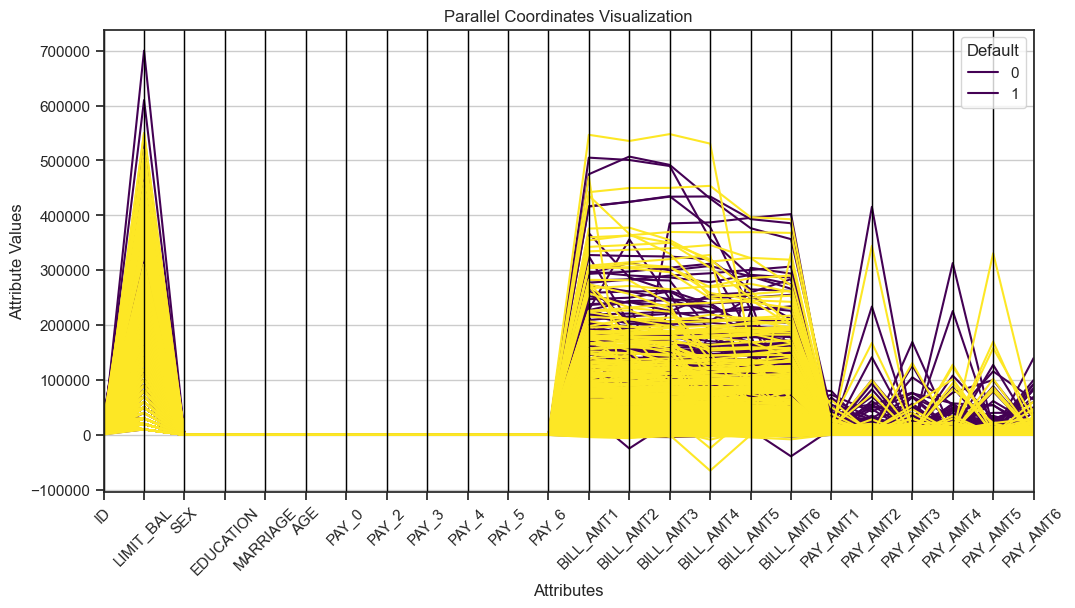

In [44]:
# 2c. (20 pts) Create a data sample of size 1000 which is randomly selected (without replacement) from the original data such that the default labels are represented equally (i.e., 500 instances with default = 1 and 500 instances with default = 0). Use parallel coordinates to visualize this data sample based on attributes X2-X11. The visualization should have a legend that shows the labels of the instances.

import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

df = pd.read_csv('Default-of-Credit-Card-Clients.csv')

# Separate the data into two subsets based on 'default' label
default_0 = df[df['default payment next month'] == 0]
default_1 = df[df['default payment next month'] == 1]

# Sample 500 instances from each subset without replacement
sample_size = 500
sample_default_0 = default_0.sample(n=sample_size, random_state=42)
sample_default_1 = default_1.sample(n=sample_size, random_state=42)

# Concatenate the two samples to create the balanced random sample
balanced_sample = pd.concat([sample_default_0, sample_default_1])

# Visualize the balanced sample using parallel coordinates

attributes_to_visualize = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','default payment next month']

plt.figure(figsize=(12, 6))
parallel_coordinates(balanced_sample, 'default payment next month', colormap='viridis')

# Add a legend
plt.legend(title='Default', loc='upper right', labels=['0', '1'])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set labels and title
plt.xlabel('Attributes')
plt.ylabel('Attribute Values')
plt.title('Parallel Coordinates Visualization')

# Show the plot
plt.show()



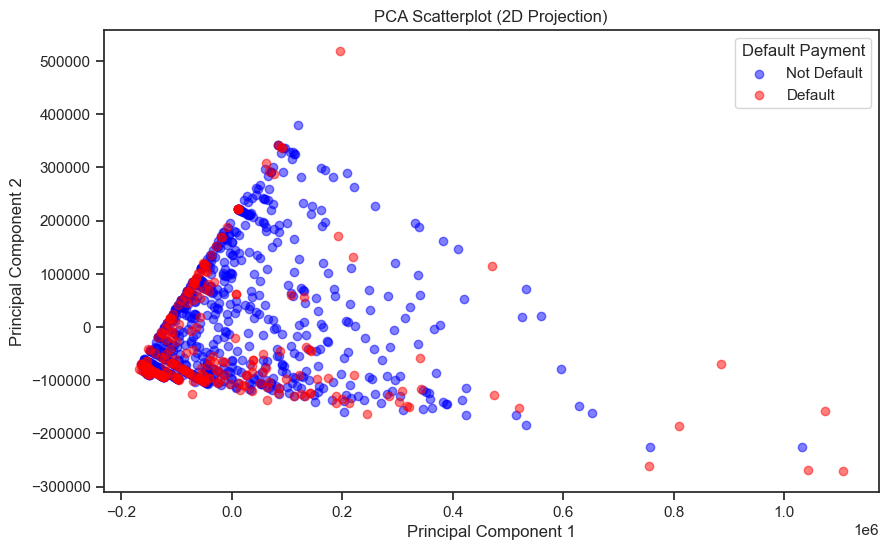

In [50]:
# 2d. (10 pts) In this task, you will generate a random sample of size 1000 from the original data, then use Principal component analysis (PCA) to reduce the number of attributes by projecting the data sample from its original high-dimensional space into a lower-dimensional space. In this case, we want to reduce the dimension from 23 to 2 for visualization using a scatterplot. The visualization should have a legend that shows the labels of the instances. Check Section 4.5 at http://www.cse.msu.edu/~ptan/dmbook/tutorials/tutorial4/tutorial4.html, follow the steps to generate the projected values and draw a scatter plot to display them.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming you have a DataFrame named 'df' with your original data
# If your columns are named differently, replace them accordingly

# Step 1: Create a random sample from the original data
sample_size = 1000
random_sample = df.sample(n=sample_size, random_state=42)

# Separate the labels from the data
labels = random_sample['default payment next month']
data = random_sample.drop(columns=['default payment next month'])

# Step 3: Perform PCA to reduce dimensionality to 2
numComponents = 2
pca = PCA(n_components=numComponents)
pca_result = pca.fit_transform(data)

# Step 4: Create a scatterplot with labels
plt.figure(figsize=(10, 6))

# Scatterplot for default = 0
plt.scatter(pca_result[labels == 0, 0], pca_result[labels == 0, 1], label='Not Default', alpha=0.5, c='blue')

# Scatterplot for default = 1
plt.scatter(pca_result[labels == 1, 0], pca_result[labels == 1, 1], label='Default', alpha=0.5, c='red')

# Set labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatterplot (2D Projection)')

# Add a legend
plt.legend(title='Default Payment', loc='upper right', labels=['Not Default', 'Default'])

# Show the plot
plt.show()

